In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 5: Managing Data with Pandas 

Pandas is a Python library for managing datasets. Documentation and examples are available on the website for Pandas: http://pandas.pydata.org/. 

In this Notebook, we'll make use of a dataset containing long-run averages of inflation, money growth, and real GDP. The dataset is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data). Recall that the quantity theory of money implies the following linear relationship between the long-run rate of money growth, the long-run rate of inflation, and the long-run rate of real GDP growth in a country:

\begin{align}
\text{inflation} & = \text{money growth} - \text{real GDP growth},
\end{align}

Generally, we treat real GDP growth and money supply growth as exogenous so this is a theory about the determination of inflation.

### Import Pandas

In [2]:
# Import the Pandas module as pd
import pandas as pd

### Import data from a csv file

Pandas has a function called `read_csv()` for reading data from a csv file into a Pandas `DataFrame` object.

In [3]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.

# Directly from internet
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv')

# From current working directory
# df = pd.read_csv('quantity_theort_data.csv')

In [4]:
# Print the first 5 rows
print(df.head())

               country iso code  observations  money growth  inflation  \
0          Afghanistan      ABW          15.0      0.150122   0.051341   
1              Albania      AFG          27.0      0.123369   0.043871   
2              Algeria      AGO          57.0      0.158140   0.097188   
3               Angola      ARE          26.0      0.797250   0.707717   
4  Antigua and Barbuda      ARG          44.0      0.085747   0.036676   

   gdp growth income group oecd  
0    0.058126          low   no  
1    0.042840       middle   no  
2    0.035629       middle   no  
3    0.051131       middle   no  
4    0.031262         high   no  


In [5]:
# Print the last 10 rows
print(df.tail(10))

                  country iso code  observations  money growth  inflation  \
152  United Arab Emirates      USA          46.0      0.120548   0.027046   
153        United Kingdom      UZB          61.0      0.101522   0.053062   
154         United States      VCT          61.0      0.073736   0.032741   
155               Uruguay      VEN          61.0      0.387103   0.342017   
156               Vanuatu      VIR          42.0      0.069385   0.040517   
157               Vietnam      VUT          26.0      0.247653   0.072937   
158    West Bank and Gaza      XKX          21.0      0.084589   0.031016   
159           Yemen, Rep.      YEM          24.0      0.178001   0.147703   
160                Zambia      ZAF          28.0      0.258613   0.169590   
161              Zimbabwe      ZMB          27.0      0.053944  -0.009568   

     gdp growth income group oecd  
152    0.043523         high   no  
153    0.022045         high  yes  
154    0.029071         high  yes  
155    0

In [6]:
# Print the type of variable 'df'
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Properties of `DataFrame` objects

Like entries in a spreadsheet file, elements in a `DataFrame` object have row (or *index*) and column coordinates. Column names are always strings. Index elements can be integers, strings, or dates.

In [7]:
# Print the columns of df
print(df.columns)

Index(['country', 'iso code', 'observations', 'money growth', 'inflation',
       'gdp growth', 'income group', 'oecd'],
      dtype='object')


In [8]:
# Create a new variable called 'money' equal to the 'money growth' column and print
money = df['money growth']
print(money)

0      0.150122
1      0.123369
2      0.158140
3      0.797250
4      0.085747
         ...   
157    0.247653
158    0.084589
159    0.178001
160    0.258613
161    0.053944
Name: money growth, Length: 162, dtype: float64


In [9]:
# Print the type of the variable money
print(type(money))

<class 'pandas.core.series.Series'>


A Pandas `Series` stores one column of data. Like a `DataFrame`, a `Series` object has an index. Note that `money` has the same index as `df`. Instead of having a column, the `Series` has a `name` attribute.

In [10]:
# Print the name of the 'money' variable
print(money.name)

money growth


Select multiple columns of a `DataFrame` by puting the desired column names in a set a of square brackets (i.e., in a `list`).

In [11]:
# Print the first 5 rows of just the inflation, money growth, and gdp growth columns
print(df[['inflation','money growth','gdp growth']].head())

   inflation  money growth  gdp growth
0   0.051341      0.150122    0.058126
1   0.043871      0.123369    0.042840
2   0.097188      0.158140    0.035629
3   0.707717      0.797250    0.051131
4   0.036676      0.085747    0.031262


As mentioned, the set of row coordinates is the index. Unless specified otherwise, Pandas automatically assigns an integer index starting at 0 to rows of the `DataFrame`.

In [12]:
# Print the index of 'df'
print(df.index)

RangeIndex(start=0, stop=162, step=1)


Note that in the index of the `df` is the numbers 0 through 177. We could have specified a different index when we imported the data using `read_csv()`. For example, suppose we want to the country names to be the index of `df`. Since country names are in the first column of the data file, we can pass the argument `index_col=0` to `read_csv()`

In [13]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv',index_col=0)

# Print first 5 rows of df
print(df.head())

                    iso code  observations  money growth  inflation  \
country                                                               
Afghanistan              ABW          15.0      0.150122   0.051341   
Albania                  AFG          27.0      0.123369   0.043871   
Algeria                  AGO          57.0      0.158140   0.097188   
Angola                   ARE          26.0      0.797250   0.707717   
Antigua and Barbuda      ARG          44.0      0.085747   0.036676   

                     gdp growth income group oecd  
country                                            
Afghanistan            0.058126          low   no  
Albania                0.042840       middle   no  
Algeria                0.035629       middle   no  
Angola                 0.051131       middle   no  
Antigua and Barbuda    0.031262         high   no  


Use the `loc` attribute to select rows of the `DataFrame` by index *values*.

In [14]:
# Create a new variable called 'usa_row' equal to the 'United States' row and print
usa_row = df.loc['United States']
print(usa_row)

iso code             VCT
observations        61.0
money growth    0.073736
inflation       0.032741
gdp growth      0.029071
income group        high
oecd                 yes
Name: United States, dtype: object


Use `iloc` attribute to select row based on integer location (starting from 0).

In [15]:
# Create a new variable called 'third_row' equal to the third row in the DataFrame and print
third_row = df.iloc[2]
print(third_row)

iso code             AGO
observations        57.0
money growth     0.15814
inflation       0.097188
gdp growth      0.035629
income group      middle
oecd                  no
Name: Algeria, dtype: object


There are several ways to return a single element of a Pandas `DataFrame`. For example, here are three that we want to return the value of inflation for the United States from the DataFrame `df`:

1. `df.loc['United States','inflation']`
2. `df.loc['United States']['inflation']`
3. `df['inflation']['United States']`

The first method points directly to the element in the `df` while the second and third methods return *copies* of the element. That means that you can modify the value of inflation for the United States by running:

    df.loc['United States','inflation'] = new_value
    
But running either:

    df.loc['United States']['inflation'] = new_value
    
or:

    df['inflation']['United States'] = new_value

will return a warning from Pandas.

In [16]:
# Print the inflation rate of the United States  (By index and column together)
print('Long-run average inflation in US: ',df.loc['United States','inflation'])

Long-run average inflation in US:  0.0327414696296093


In [17]:
# Print the inflation rate of the United States (first by index, then by column)
print('Long-run average inflation in US: ',df.loc['United States']['inflation'])

Long-run average inflation in US:  0.0327414696296093


In [18]:
# Print the inflation rate of the United States  (first by column, then by index)
print('Long-run average inflation in US: ',df['inflation']['United States'])

Long-run average inflation in US:  0.0327414696296093


New columns are easily created as functions of existing columns.

In [19]:
# Create a new column called 'difference' equal to the money growth column minus 
# the inflation column and print the modified DataFrame
df['difference'] = df['money growth'] - df['inflation']
print(df['difference'])

country
Afghanistan            0.098781
Albania                0.079498
Algeria                0.060952
Angola                 0.089533
Antigua and Barbuda    0.049071
                         ...   
Vietnam                0.174716
West Bank and Gaza     0.053573
Yemen, Rep.            0.030298
Zambia                 0.089023
Zimbabwe               0.063513
Name: difference, Length: 162, dtype: float64


In [20]:
# Print the average difference between money growth and inflation
print(df.difference.mean())

0.06885923002185035


In [21]:
# Remove the following columns from the DataFrame: 'iso code','observations','difference'
df = df.drop(['iso code','observations','difference'],axis=1)

# Print the modified DataFrame
print(df)

                     money growth  inflation  gdp growth income group oecd
country                                                                   
Afghanistan              0.150122   0.051341    0.058126          low   no
Albania                  0.123369   0.043871    0.042840       middle   no
Algeria                  0.158140   0.097188    0.035629       middle   no
Angola                   0.797250   0.707717    0.051131       middle   no
Antigua and Barbuda      0.085747   0.036676    0.031262         high   no
...                           ...        ...         ...          ...  ...
Vietnam                  0.247653   0.072937    0.064132       middle   no
West Bank and Gaza       0.084589   0.031016    0.039549       middle   no
Yemen, Rep.              0.178001   0.147703    0.040082          low   no
Zambia                   0.258613   0.169590    0.044777       middle   no
Zimbabwe                 0.053944  -0.009568    0.013777       middle   no

[162 rows x 5 columns]


### Methods

A Pandas `DataFrame` has a bunch of useful methods defined for it. `describe()` returns some summary statistics.

In [22]:
# Print the summary statistics for 'df'
print(df.describe())

       money growth   inflation  gdp growth
count    162.000000  162.000000  162.000000
mean       0.188738    0.119879    0.036943
std        0.156622    0.158218    0.017268
min        0.040071   -0.009568   -0.010853
25%        0.104196    0.043109    0.024999
50%        0.143813    0.069918    0.036079
75%        0.202586    0.118837    0.045568
max        1.247697    1.277045    0.127119


The `corr()` method returns a `DataFrame` containing the correlation coefficients of the specified `DataFrame`.

In [23]:
# Create a variable called 'correlations' containg the correlation coefficients for columns in 'df'
correlations = df.corr()

# Print the correlation coefficients
print(correlations)

              money growth  inflation  gdp growth
money growth      1.000000   0.978308   -0.020246
inflation         0.978308   1.000000   -0.158838
gdp growth       -0.020246  -0.158838    1.000000


In [24]:
# Print the correlation coefficient for inflation and money growth
print('corr of inflation and money growth: ',round(correlations.loc['inflation','money growth'],4))

# Print the correlation coefficient for inflation and real GDP growth
print('corr of inflation and gdp growth:   ',round(correlations.loc['inflation','gdp growth'],4))

# Print the correlation coefficient for money growth and real GDP growth
print('corr of money growth and gdp growth:',round(correlations.loc['money growth','gdp growth'],4))

corr of inflation and money growth:  0.9783
corr of inflation and gdp growth:    -0.1588
corr of money growth and gdp growth: -0.0202


`sort_values()` returns a copy of the original `DataFrame` sorted along the given column. The optional argument `ascending` is set to `True` by default, but can be changed to `False` if you want to print the lowest first.

In [25]:
# Print rows for the countries with the 10 lowest inflation rates
print(df.sort_values('inflation').head(10))

                       money growth  inflation  gdp growth income group oecd
country                                                                     
Zimbabwe                   0.053944  -0.009568    0.013777       middle   no
Switzerland                0.055312   0.015849    0.017889         high  yes
Hong Kong SAR, China       0.082692   0.016500    0.030936         high   no
Kosovo                     0.090937   0.017213    0.037735       middle   no
Canada                     0.104122   0.018238    0.037405         high  yes
Belize                     0.092666   0.020852    0.041983       middle   no
Micronesia, Fed. Sts.      0.040071   0.023155    0.001735       middle   no
Singapore                  0.114496   0.023922    0.068386         high   no
Kuwait                     0.068904   0.024194    0.038129         high   no
Israel                     0.082680   0.025345    0.036902         high  yes


In [26]:
# Print rows for the countries with the 10 highest inflation rates
print(df.sort_values('inflation',ascending=False).head(10))

                  money growth  inflation  gdp growth income group oecd
country                                                                
Congo, Dem. Rep.      1.247697   1.277045   -0.002394          low   no
Brazil                0.884725   0.767461    0.037831       middle   no
Argentina             0.763078   0.712015    0.024488       middle   no
Angola                0.797250   0.707717    0.051131       middle   no
Nicaragua             0.613518   0.544903    0.024499       middle   no
Ukraine               0.491991   0.515215   -0.010853       middle   no
Belarus               0.538495   0.487218    0.039307       middle   no
Peru                  0.507193   0.428785    0.035455       middle   no
Armenia               0.404728   0.355708    0.050477       middle   no
Azerbaijan            0.412026   0.351026    0.043543       middle   no


Note that `sort_values` and `sort_index` return *copies* of the original `DataFrame`. If, in the previous example, we had wanted to actually modify `df`, we would have need to explicitly overwrite it:

    df = df.sort_index(ascending=False)

In [27]:
# Print first 10 rows with the index sorted in descending alphabetical order
print(df.sort_index(ascending=False).head(10))

                      money growth  inflation  gdp growth income group oecd
country                                                                    
Zimbabwe                  0.053944  -0.009568    0.013777       middle   no
Zambia                    0.258613   0.169590    0.044777       middle   no
Yemen, Rep.               0.178001   0.147703    0.040082          low   no
West Bank and Gaza        0.084589   0.031016    0.039549       middle   no
Vietnam                   0.247653   0.072937    0.064132       middle   no
Vanuatu                   0.069385   0.040517    0.021934       middle   no
Uruguay                   0.387103   0.342017    0.020389         high   no
United States             0.073736   0.032741    0.029071         high  yes
United Kingdom            0.101522   0.053062    0.022045         high  yes
United Arab Emirates      0.120548   0.027046    0.043523         high   no


### Quick plotting example

Construct a graph that visually confirms the quantity theory of money by making a scatter plot with average money growth on the horizontal axis and average inflation on the vertical axis. Set the marker size `s` to 50 and opacity (`alpha`) 0.25. Add a 45 degree line, axis labels, and a title. Lower and upper limits for the horizontal and vertical axes should be -0.2 and 1.2.

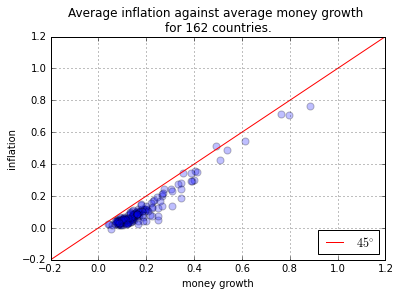

In [28]:
# Create data for 45 degree line
x45 = [-0.2,1.2]
y45 = [-0.2,1.2]

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot 45 degree line and create legend in lower right corner
ax.plot(x45,y45,'-r',label = '$45^{\circ}$')
ax.legend(loc='lower right')

# Scatter plot of data inflation against money growth
ax.scatter(df['money growth'],df['inflation'],s=50,alpha = 0.25)
ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.2,1.2])
ax.set_xlabel('money growth')
ax.set_ylabel('inflation')
ax.set_title('Average inflation against average money growth \nfor '+str(len(df.index))+' countries.')
ax.grid()

### Exporting a `DataFrame` to csv

Use the DataFrame method `to_csv()` to export DataFrame to a csv file.

In [29]:
# Export the DataFrame 'df' to a csv file called 'modified_data.csv'.
df.to_csv('modified_data.csv')